### Background


- You have been given a collection of data from a company wishing to process its customer records for business purposes (acw_user_data.csv). The existing systems in-place at the company only export to a CSV file, and this is not in an appropriate format for analysis. You have been given the task of preparing this data for further analyses by your colleagueswithin the company, including representation changes, filtering, and deriving some new attributes / metrics for them. These data include attributes such as first name, second name, credit card number, marital status, and even contains data on the customer’s car. The number of records provided is significant, and therefore it is expected that solutions are robust to varying types of data, and varying values, offering a programmatic solution.


### Tasks

##### Data Processing



- Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv,
- you have been given the following tasks:
1. Read in the provided ACW Data using the CSV library.
2. As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. 
- Convert all flat structures into nested structures. These are notably:
- a. Vehicle - consists of make, model, year, and type
- b. Credit Card - consists of start date, end date, number, security code, and IBAN.
- c. Address - consists of the main address, city, and postcode.

- For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.
- Note: Ensure that the values read in are appropriately cast to their respective types.
3. The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered.Print a list where all such error corrections take place. E.g. Problematic rows for dependants: [16, 58, 80, 98]
4. Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.
5. You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field inthe CSV) and be in the JSON data format.
6. The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

7. You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:
- a. Add, and calculate appropriately, this new attribute. It should represent the
- Salary that a customer earns, per mile of their commute.
- Note: If a person travels 1 or fewer commute Km, then their salary-
- commute would be just their salary.
- b. Sort these records by that new metric, in ascending order.
- c. Store the output file out as a JSON format, for a commute.json file

#### Data Visualisati


- Using Pandas and Seaborn
- Your client wishes to understand the data they have on their customers a bit more by use of
- visualisations. With use of Pandas and Seaborn read in the original CSV file provided with the assignment.
1. Obtain the Data Series for Salary, and Age, and calculate the following:
- a. Mean Salary
- b. Median Age

2. Perform univariate plots of the following data attributes:
a. Age, calculating how many bins would be required for a bin_width of 5.
b. Dependents, fixing data errors with seaborn itself.
c. Age (of default bins), conditioned on Marital Status

3. Perform multivariate plots with the following data attributes:
a. Commuted distance against salary.
b. Age against Salary
c. Age against Salary conditioned by Dependants

4. Your client would like the ability to save the plots which you have produced. Provide
a Notebook cell which can do this

### DATA PROCESSING

### Task 1- Read in the provided ACW Data using the CSV library

In [1]:
import csv # import csv module to allow the file to be read using cvs library
           # Context manager "with" was applied to manage file closure
           # DictReader chosen over reader because the file has a column header to be use as key

with open('acw_user_data .csv', mode='r') as file:
    reader = csv.DictReader(file, delimiter=',')
    customer_records = list(reader) 
    
    # the list function is to allow conversion of the object in the redaer to a list
     # to avoid repeatedly opening and closing of the csv in the course of my work

In [2]:
customer_records

[{'Address Street': '70 Lydia isle',
  'Address City': 'Lake Conor',
  'Address Postcode': 'S71 7XZ',
  'Age (Years)': '89',
  'Distance Commuted to Work (Km)': '0',
  'Employer Company': 'N/A',
  'Credit Card Start Date': '08/18',
  'Credit Card Expiry Date': '11/27',
  'Credit Card Number': '676373692463',
  'Credit Card CVV': '875',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '7257',
  'Retired': 'True',
  'Yearly Salary (GBP)': '72838',
  'Sex': 'Male',
  'Vehicle Make': 'Hyundai',
  'Vehicle Model': 'Bonneville',
  'Vehicle Year': '2009',
  'Vehicle Type': 'Pickup'},
 {'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT',
  'Age (Years)': '46',
  'Distance Commuted to Work (Km)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Credit Card Start Date': '08/12',
  'Credit Card Expiry Date': 

### Task 2- Conversion of flat structures into netsed structures

- Conversion of flat structures into netsed structures

In [3]:
### craete a list of dictionaries based on the data stored as customer_records
### list of dictionaries: vehicle details, credit card details, and address details


- 2a: processing for details of vehicle

In [4]:

header = customer_records[0] # The first Dictionary in the staored data contains a header
 
    # processing for details of Vehicle   
vehicle_details = [{'Vehicle Make': items['Vehicle Make'],
                       'Vehicle Model': items['Vehicle Model'],
                       'Vehicle Year': int(items['Vehicle Year']),
                       'Vehicle Type': items['Vehicle Type']}
                      for items in customer_records[1:]]


In [5]:
from pprint import pprint # to print/display data in a more structured manner

print({'Vehicle Details'})
print(vehicle_details)

{'Vehicle Details'}
[{'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': 1996, 'Vehicle Type': 'Coupe'}, {'Vehicle Make': 'GMC', 'Vehicle Model': 'Achieva', 'Vehicle Year': 2015, 'Vehicle Type': 'Convertible, Coupe'}, {'Vehicle Make': 'Scion', 'Vehicle Model': 'F150 SuperCrew Cab', 'Vehicle Year': 1994, 'Vehicle Type': 'Pickup'}, {'Vehicle Make': 'Buick', 'Vehicle Model': 'Outback', 'Vehicle Year': 2020, 'Vehicle Type': 'SUV'}, {'Vehicle Make': 'Lexus', 'Vehicle Model': 'Paceman', 'Vehicle Year': 2004, 'Vehicle Type': 'Van/Minivan'}, {'Vehicle Make': 'Lexus', 'Vehicle Model': 'S-Series', 'Vehicle Year': 1998, 'Vehicle Type': 'Van/Minivan'}, {'Vehicle Make': 'Volvo', 'Vehicle Model': 'Express 3500 Passenger', 'Vehicle Year': 2013, 'Vehicle Type': 'SUV'}, {'Vehicle Make': 'Volkswagen', 'Vehicle Model': 'Town & Country', 'Vehicle Year': 2010, 'Vehicle Type': 'Sedan, Coupe, Hatchback'}, {'Vehicle Make': 'Dodge', 'Vehicle Model': 'Impreza', 'Vehicle Year': 2015, 'Vehicle Type

- 2b:processing for details of credit card

In [6]:
 # processisng for details of Credit card 
 # the details of the credit card, though numeriacl in nature would not be casted as int
    # they are basically unique:are also security identity which could be altered if casted as int
    
credit_card_details = [{'Credit Card Start Date': items['Credit Card Start Date'],
                       'Credit Card Expiry Date': items['Credit Card Expiry Date'],
                       'Credit Card Number': items['Credit Card Number'],
                       'Credit Card CVV': items['Credit Card CVV'],
                       'IBAN': items['Bank IBAN']}
                      for items in customer_records[1:]]

In [7]:
print({'Credit Card Details'})
print(credit_card_details)

{'Credit Card Details'}
[{'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Credit Card CVV': '583', 'IBAN': 'GB37UMCO54540228728019'}, {'Credit Card Start Date': '11/19', 'Credit Card Expiry Date': '07/27', 'Credit Card Number': '4091726363083888495', 'Credit Card CVV': '422', 'IBAN': 'GB40CVUE84011545859591'}, {'Credit Card Start Date': '10/17', 'Credit Card Expiry Date': '04/18', 'Credit Card Number': '4671332769487632633', 'Credit Card CVV': '669', 'IBAN': 'GB40YPKK71613332239280'}, {'Credit Card Start Date': '04/19', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '2245094149128526', 'Credit Card CVV': '659', 'IBAN': 'GB95WAYW31715898077181'}, {'Credit Card Start Date': '03/15', 'Credit Card Expiry Date': '05/15', 'Credit Card Number': '4485214746578045493', 'Credit Card CVV': '123', 'IBAN': 'GB29SSDY05529526374313'}, {'Credit Card Start Date': '07/12', 'Credit Card Expiry Date': '03/29', 'Credit Card Number

- 2c: processing for details of Address

In [8]:
address_details = [{'Address Street': items['Address Street'],
             'Address City': items['Address City'],
             'Address Postcode': items['Address Postcode']}
            for items in customer_records[1:]]

In [9]:
print({'Address Details'})
print(address_details)

{'Address Details'}
[{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT'}, {'Address Street': 'Studio 33K Joel walk', 'Address City': 'Randallborough', 'Address Postcode': 'ME3N 1GH'}, {'Address Street': 'Studio 46S Bethany lights', 'Address City': 'East Reece', 'Address Postcode': 'E10 9RJ'}, {'Address Street': 'Flat 3 Christine views', 'Address City': 'Fletcherstad', 'Address Postcode': 'WS2 9SN'}, {'Address Street': 'Studio 43M Emily rapid', 'Address City': 'West Derekborough', 'Address Postcode': 'W1J 0DL'}, {'Address Street': '24 Heather locks', 'Address City': 'New Mathew', 'Address Postcode': 'WD10 1LX'}, {'Address Street': '81 Goodwin dam', 'Address City': 'Griffinstad', 'Address Postcode': 'G3 7ZX'}, {'Address Street': '798 Yates crescent', 'Address City': 'Port Lisa', 'Address Postcode': 'LS0M 7UU'}, {'Address Street': 'Studio 77c Gail tunnel', 'Address City': 'Garyberg', 'Address Postcode': 'S7W 4DW'}, {'Address Street': '2 Rober

### Task 3: Treating for the empty (missing) entries of row in the dependants column 

In [10]:
header1 = customer_records[0]
dependants = [content.get('Dependants', '') for content in customer_records[1:]] 

# running a loop  through the thedependant column to check for empty row
# correcting the empty rows by filling with 0 accordingly

row_correction = [i for i, item in enumerate(dependants, start=1) if item == ' ' or item == '']
dependants = [0 if item == ' ' or item == '' else int(item) for item in dependants]

print(f'Problematic rows for dependants: {row_correction}')

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


 - It is observed that 19 rows are missing and listed above.

### Task 4 Write all records to a processed.json file using the JSON data format.

In [11]:
import json # to allow work on json file
from distutils.util import strtobool 
# allows for coversion of string representation of boolean values to real boolean(true or false)
        # in json format

def string_to_bool(value):#the function is created to convert the above output to python boolean
    return bool (strtobool(value))

header2 = customer_records[0]
processed_data = [] #initialize the variable 'proccessed data' and assign it an ampty list

for items in customer_records[1:]: 
    
#creating a loop that iterates through the element starting from the element in index 1 (2nd element)

    individual_data = {'First Name': items.get('First Name', ''),
        'Last Name': items.get('Last Name', ''),
        'Age': int(items.get('Age (Years)', 0)), # catsed as integer
        'Sex': items.get('Sex', ''),
        'retired': string_to_bool(items.get('Retired', '')),
        'Marital Status': items.get('Marital Status', ''),
        'Dependant': int(dependants[customer_records.index(items) - 1]), # casted as integer
        'Salary': float(items.get('Yearly Salary (GBP)', 0)), # casted as float
        'Pension': float(items.get('Yearly Pension (GBP)', 0)), # casted as float
        'company': items.get('Employer Company', ''),
        'Commuted Distance': float(items.get('Distance Commuted to Work (Km)', 0)),
        'Vehicle': vehicle_details[customer_records.index(items) - 1],
        'Credit Card': credit_card_details[customer_records.index(items) - 1],
        'Address': address_details[customer_records.index(items) - 1]}
    processed_data.append(individual_data)

with open('processed.json', mode='w') as output_data:
    json.dump(processed_data, output_data, indent=4) 
    #json.dump to allow the json dta to be loaded back into a python object when needed in the future.
                                                                                     


In [12]:

# Print the processed data:
print(json.dumps(processed_data, indent=4))


[
    {
        "First Name": "Jonathan",
        "Last Name": "Thomas",
        "Age": 46,
        "Sex": "Male",
        "retired": false,
        "Marital Status": "married or civil partner",
        "Dependant": 1,
        "Salary": 54016.0,
        "Pension": 0.0,
        "company": "Begum-Williams",
        "Commuted Distance": 13.72,
        "Vehicle": {
            "Vehicle Make": "Nissan",
            "Vehicle Model": "ATS",
            "Vehicle Year": 1996,
            "Vehicle Type": "Coupe"
        },
        "Credit Card": {
            "Credit Card Start Date": "08/12",
            "Credit Card Expiry Date": "11/26",
            "Credit Card Number": "4529436854129855",
            "Credit Card CVV": "583",
            "IBAN": "GB37UMCO54540228728019"
        },
        "Address": {
            "Address Street": "00 Wheeler wells",
            "Address City": "Chapmanton",
            "Address Postcode": "L2 7BT"
        }
    },
    {
        "First Name": "Antony",
    

### Task 5:creation of two additional file outputs, retired.json and employed.json to contain data below
- all retired customers and all employed customer: all in json format

In [13]:
# using the filter and lambda function to create two filtered list
# retired customers
# employed customers
# the mabda function helps to check if the value in the 'company'key is not eaual(N/A);the value is then taken as employed 
   

employed_customers = list(filter(lambda customer: customer.get('company') != 'N/A', processed_data))
retired_customers = list(filter(lambda customer: customer.get('retired'), processed_data))


with open('employed.json', mode='w') as employed_data: # employed customers written to employed.json file
    json.dump(employed_customers, employed_data, indent=4)
    


with open('retired.json', mode='w') as retired_data: # retired customers written to retired.json file
    json.dump(retired_customers, retired_data, indent=4)


In [14]:
print(json.dumps(employed_customers, indent=4)) # print the output

[
    {
        "First Name": "Jonathan",
        "Last Name": "Thomas",
        "Age": 46,
        "Sex": "Male",
        "retired": false,
        "Marital Status": "married or civil partner",
        "Dependant": 1,
        "Salary": 54016.0,
        "Pension": 0.0,
        "company": "Begum-Williams",
        "Commuted Distance": 13.72,
        "Vehicle": {
            "Vehicle Make": "Nissan",
            "Vehicle Model": "ATS",
            "Vehicle Year": 1996,
            "Vehicle Type": "Coupe"
        },
        "Credit Card": {
            "Credit Card Start Date": "08/12",
            "Credit Card Expiry Date": "11/26",
            "Credit Card Number": "4529436854129855",
            "Credit Card CVV": "583",
            "IBAN": "GB37UMCO54540228728019"
        },
        "Address": {
            "Address Street": "00 Wheeler wells",
            "Address City": "Chapmanton",
            "Address Postcode": "L2 7BT"
        }
    },
    {
        "First Name": "Antony",
    

In [15]:
print(json.dumps(retired_customers, indent=4)) # print the output

[
    {
        "First Name": "Clive",
        "Last Name": "Evans",
        "Age": 67,
        "Sex": "Male",
        "retired": true,
        "Marital Status": "single",
        "Dependant": 1,
        "Salary": 27964.0,
        "Pension": 28075.0,
        "company": "N/A",
        "Commuted Distance": 0.0,
        "Vehicle": {
            "Vehicle Make": "Volvo",
            "Vehicle Model": "Express 3500 Passenger",
            "Vehicle Year": 2013,
            "Vehicle Type": "SUV"
        },
        "Credit Card": {
            "Credit Card Start Date": "07/15",
            "Credit Card Expiry Date": "04/27",
            "Credit Card Number": "213199489183130",
            "Credit Card CVV": "389",
            "IBAN": "GB04VSAZ69128049616822"
        },
        "Address": {
            "Address Street": "81 Goodwin dam",
            "Address City": "Griffinstad",
            "Address Postcode": "G3 7ZX"
        }
    },
    {
        "First Name": "Malcolm",
        "Last Name": 

### Task 6

 - A flag created to separate two classes of credit card based on the difference between start date and expiry date 
 - The output is then written to separate file called remove_ccard.json
 - Data access from the row csv file ('acw_user_data.csv')

In [16]:
# craeting a function to evaluate the difference in start and expiry date s of the credit cards
# flag to output 'false' if difference in the above dates is less than 10 and otherwise "true"
def remove_credit_card(row):
    flag = True
    card_start  = int(row['Credit Card Start Date'][-2:])
    card_expiry  = int(row['Credit Card Expiry Date'][-2:])
    difference = card_expiry - card_start
    if difference < 10:
        flag = False
        
    return flag

In [17]:
def read_csvdata(path): # function to access the original csv file
    
    original_file = open(path, 'r')
    reader = csv.DictReader(original_file)
    return reader
reader = read_csvdata('acw_user_data .csv')


In [18]:


flag_output = []

for row in reader:
    flag = remove_credit_card(row)
    row['flag'] = flag
    flag_output.append(row)

In [19]:
flag_output

[{'Address Street': '70 Lydia isle',
  'Address City': 'Lake Conor',
  'Address Postcode': 'S71 7XZ',
  'Age (Years)': '89',
  'Distance Commuted to Work (Km)': '0',
  'Employer Company': 'N/A',
  'Credit Card Start Date': '08/18',
  'Credit Card Expiry Date': '11/27',
  'Credit Card Number': '676373692463',
  'Credit Card CVV': '875',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Bank IBAN': 'GB62PQKB71416034141571',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '7257',
  'Retired': 'True',
  'Yearly Salary (GBP)': '72838',
  'Sex': 'Male',
  'Vehicle Make': 'Hyundai',
  'Vehicle Model': 'Bonneville',
  'Vehicle Year': '2009',
  'Vehicle Type': 'Pickup',
  'flag': False},
 {'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT',
  'Age (Years)': '46',
  'Distance Commuted to Work (Km)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Credit Card Start Date': '08/12',
  'Credit Ca

In [20]:
output_path = 'remove_ccard.json'
with open(output_path, 'w') as json_file:
    json.dump(flag_output, json_file, indent=2)

print(f"Output saved to {output_path}")

Output saved to remove_ccard.json


### Task 7

 ### 7a

In [21]:





# 1km = 0.621371 Miles


fp = open('processed.json', 'r') # loading the proccessed json file
processed = json.load(fp)

salary_commute =[]

for row in processed: # iterating through each employee information 
    distance = row['Commuted Distance'] # distance in km
    salary = row['Salary']
    
  #  distance and salary information 
    # km to miles
    distance_conversion = distance * 0.621371 # distance in miles
    if distance <=1:
        row['Salary-Commute'] = salary
    else:
        row['Salary-Commute'] = salary/distance_conversion
    salary_commute.append(row)

In [22]:
salary_commute

[{'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Age': 46,
  'Sex': 'Male',
  'retired': False,
  'Marital Status': 'married or civil partner',
  'Dependant': 1,
  'Salary': 54016.0,
  'Pension': 0.0,
  'company': 'Begum-Williams',
  'Commuted Distance': 13.72,
  'Vehicle': {'Vehicle Make': 'Nissan',
   'Vehicle Model': 'ATS',
   'Vehicle Year': 1996,
   'Vehicle Type': 'Coupe'},
  'Credit Card': {'Credit Card Start Date': '08/12',
   'Credit Card Expiry Date': '11/26',
   'Credit Card Number': '4529436854129855',
   'Credit Card CVV': '583',
   'IBAN': 'GB37UMCO54540228728019'},
  'Address': {'Address Street': '00 Wheeler wells',
   'Address City': 'Chapmanton',
   'Address Postcode': 'L2 7BT'},
  'Salary-Commute': 6336.031515901217},
 {'First Name': 'Antony',
  'Last Name': 'Jones',
  'Age': 22,
  'Sex': 'Male',
  'retired': False,
  'Marital Status': 'married or civil partner',
  'Dependant': 1,
  'Salary': 68049.0,
  'Pension': 0.0,
  'company': 'Hill-Wright',
  'Commuted Di

### 7b

In [23]:
# sortING the Salary-commute results in ascending order using the Salary_Commute metric
salary_commute.sort(key = lambda x: x['Salary-Commute'])

In [24]:
salary_commute

[{'First Name': 'Graeme',
  'Last Name': 'Jackson',
  'Age': 52,
  'Sex': 'Male',
  'retired': False,
  'Marital Status': 'single',
  'Dependant': 2,
  'Salary': 17046.0,
  'Pension': 0.0,
  'company': 'Smith, Birch and Burke',
  'Commuted Distance': 5.52,
  'Vehicle': {'Vehicle Make': 'Chevrolet',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Year': 2011,
   'Vehicle Type': 'SUV'},
  'Credit Card': {'Credit Card Start Date': '06/14',
   'Credit Card Expiry Date': '04/29',
   'Credit Card Number': '4713424668774153',
   'Credit Card CVV': '3053',
   'IBAN': 'GB09ELJH35362236053720'},
  'Address': {'Address Street': 'Studio 9 Reid lights',
   'Address City': 'South Ryan',
   'Address Postcode': 'E27 9GY'},
  'Salary-Commute': 4969.725780992145},
 {'First Name': 'Janet',
  'Last Name': 'Quinn',
  'Age': 30,
  'Sex': 'Female',
  'retired': False,
  'Marital Status': 'married or civil partner',
  'Dependant': 1,
  'Salary': 17428.0,
  'Pension': 0.0,
  'company': 'Wood-Davies',
  'Co

### 7c

In [25]:

file_path = "commute.json"


with open(file_path, 'w') as json_file: # write otput to json file
    json.dump(salary_commute, json_file, indent=2)

In [26]:
salary_commute

[{'First Name': 'Graeme',
  'Last Name': 'Jackson',
  'Age': 52,
  'Sex': 'Male',
  'retired': False,
  'Marital Status': 'single',
  'Dependant': 2,
  'Salary': 17046.0,
  'Pension': 0.0,
  'company': 'Smith, Birch and Burke',
  'Commuted Distance': 5.52,
  'Vehicle': {'Vehicle Make': 'Chevrolet',
   'Vehicle Model': 'Rally Wagon 1500',
   'Vehicle Year': 2011,
   'Vehicle Type': 'SUV'},
  'Credit Card': {'Credit Card Start Date': '06/14',
   'Credit Card Expiry Date': '04/29',
   'Credit Card Number': '4713424668774153',
   'Credit Card CVV': '3053',
   'IBAN': 'GB09ELJH35362236053720'},
  'Address': {'Address Street': 'Studio 9 Reid lights',
   'Address City': 'South Ryan',
   'Address Postcode': 'E27 9GY'},
  'Salary-Commute': 4969.725780992145},
 {'First Name': 'Janet',
  'Last Name': 'Quinn',
  'Age': 30,
  'Sex': 'Female',
  'retired': False,
  'Marital Status': 'married or civil partner',
  'Dependant': 1,
  'Salary': 17428.0,
  'Pension': 0.0,
  'company': 'Wood-Davies',
  'Co

### Data Visualization
- Reading the original csv file using pandas and seaborn

In [27]:
### import pandas and seaborn to enable reading of the csv file:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [28]:
 # the location where the file is resident

acw_user_data_df = pd.read_csv('acw_user_data .csv')

In [29]:
acw_user_data_df.head() #this display the firat five rows on the file:
                        # This is neccessary to give a quick glance of file

Address Street    Address City Address Postcode  Age (Years)  \
0              70 Lydia isle      Lake Conor          S71 7XZ           89   
1           00 Wheeler wells      Chapmanton           L2 7BT           46   
2       Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3  Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4     Flat 3 Christine views    Fletcherstad          WS2 9SN           57   

   Distance Commuted to Work (Km)          Employer Company  \
0                            0.00                       NaN   
1                           13.72            Begum-Williams   
2                           16.02               Hill-Wright   
3                           19.35                 Green LLC   
4                            5.94  Hill, Evans and Harrison   

  Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                  08/18                   11/27         676373692463   
1                  08/12                   11/26     4529436854129855   
2                  11/19                   07/27  4091726363083888495   
3                  10/17                   04/18  4671332769487632633   
4                  04/19                   11/27     2245094149128526   

   Credit Card CVV  ...  Last Name            Marital Status  \
0              875  ...     Wilson  married or civil partner   
1              583  ...     Thomas  married or civil partner   
2              422  ...      Jones  married or civil partner   
3              669  ...       Shaw  married or civil partner   
4              659  ...    O'Brien  married or civil partner   

  Yearly Pension (GBP) Retired Yearly Salary (GBP)     Sex  Vehicle Make  \
0                 7257    True               72838    Male       Hyundai   
1                    0   False               54016    Male        Nissan   
2                    0   False               68049    Male           GMC   
3                    0   False               91337    Male         Scion   
4                    0   False               18446  Female         Buick   

        Vehicle Model Vehicle Year        Vehicle Type  
0          Bonneville         2009              Pickup  
1                 ATS         1996               Coupe  
2             Achieva         2015  Convertible, Coupe  
3  F150 SuperCrew Cab         1994              Pickup  
4             Outback         2020                 SUV  

[5 rows x 23 columns]

In [30]:
acw_user_data_df.tail() #this display the last five rows on the file:
                        # This is neccessary to give a quick glance of file

Address Street  Address City Address Postcode  Age (Years)  \
995  Studio 6 Heather prairie  North Amelia           E9 0HB           48   
996         Flat 3 Davies run    Greenshire           E7 4UJ           22   
997    Flat 7 Barber motorway  Burrowsshire          L62 8TA           38   
998             00 Tony forks     Abbiebury          NP4 1JL           45   
999      Flat 9 Mohamed route     West Glen         LL3M 4WS           80   

     Distance Commuted to Work (Km) Employer Company Credit Card Start Date  \
995                           18.44    Phillips-Pope                  04/19   
996                           19.61       Hughes LLC                  05/12   
997                            6.66     Bailey Group                  01/13   
998                           18.13     Foster-Price                  04/19   
999                            0.00              NaN                  12/14   

    Credit Card Expiry Date  Credit Card Number  Credit Card CVV  ...  \
995                   08/26    3563802099155576              908  ...   
996                   07/28    3591311819315276              675  ...   
997                   05/29    3584931475767707              679  ...   
998                   05/23    4090311300716168              775  ...   
999                   01/16     180020306382110              903  ...   

     Last Name            Marital Status Yearly Pension (GBP) Retired  \
995      Clark  married or civil partner                    0   False   
996      Jones  married or civil partner                    0   False   
997     Walker                    single                    0   False   
998    Thomson  married or civil partner                    0   False   
999    Russell                    single                22869    True   

    Yearly Salary (GBP)     Sex  Vehicle Make      Vehicle Model Vehicle Year  \
995               84645    Male        Saturn        Convertible         2015   
996               93314  Female        Toyota              Yukon         2015   
997               20940  Female          Ford                 S6         2020   
998               82412    Male         Scion  Ram 1500 Quad Cab         2015   
999               25788  Female           Geo                 S7         1993   

    Vehicle Type  
995  Van/Minivan  
996  Van/Minivan  
997        Sedan  
998       Pickup  
999  Van/Minivan  

[5 rows x 23 columns]

- Its observed that the file has 23 columns
 - The columns are presented below


In [31]:
acw_user_data_df.columns

Index(['Address Street', 'Address City', 'Address Postcode', 'Age (Years)',
       'Distance Commuted to Work (Km)', 'Employer Company',
       'Credit Card Start Date', 'Credit Card Expiry Date',
       'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name',
       'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)',
       'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make',
       'Vehicle Model', 'Vehicle Year', 'Vehicle Type'],
      dtype='object')

### Task 1: Obtaining the Data Series for Salary, and Age, and calculate the following:
- a: Mean Salary
- b: Median Age

In [32]:
# Data series for salary
acw_user_data_df['Yearly Salary (GBP)']


0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [33]:
# Data series for Age
acw_user_data_df['Age (Years)']

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

- 1a: Mean Salary

In [34]:
# Mean Salary

acw_user_data_df['Yearly Salary (GBP)'].mean()

print(f'The mean Yearly Salary is: {acw_user_data_df["Yearly Salary (GBP)"].mean()}')

The mean Yearly Salary is: 57814.078


- 1b: Median Age

In [35]:
# median Age

acw_user_data_df['Age (Years)'].median()

print(f'The median Age is: {acw_user_data_df["Age (Years)"].median()}')

The median Age is: 54.0


### Task 2. Perform univariate plots of the following data attributes:
- a. Age, calculating how many bins would be required for a bin_width of 5.
- b. Dependents, fixing data errors with seaborn itself.
- c. Age (of default bins), conditioned on Marital Status

            - calculating the number of bins required for a bin_width of 5    

In [36]:
# Age: calculating how many bins would be required for a bin_width of 5

bin_width = 5
max_age = acw_user_data_df['Age (Years)'].max()
min_age = acw_user_data_df['Age (Years)'].min()
print(f' The maximum age is {max_age}')
print(f' The minimum age is {min_age}')

# To calculate number of bins
num_bins = round((max_age - min_age)/(bin_width))# rounding up to a whole number
print(f'The number of bins in the univariate plot of Age is: {num_bins}')

 The maximum age is 91
 The minimum age is 18
The number of bins in the univariate plot of Age is: 15


              - univariate plots for Age using Histogram

Text(0.5, 1.0, 'Histogram plot of Age with Kernel Density Estimate')

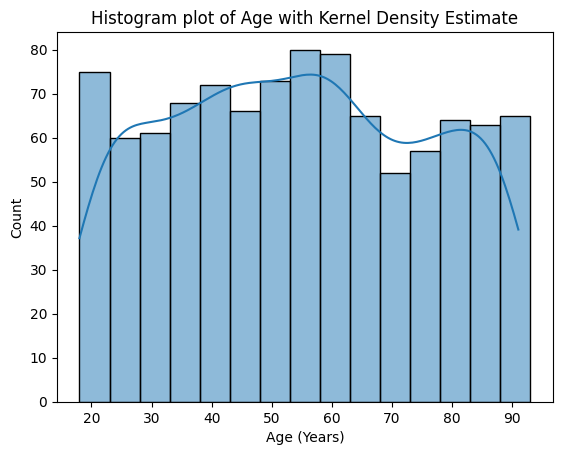

In [37]:
# perfroming univariate plots for Age using Histogram (Histplots) with kernel density estimate
import seaborn as sns
Age_plot_kde = sns.histplot(data=acw_user_data_df['Age (Years)'], binwidth=5, kde=True) # Histogram plot with kde

plt.title('Histogram plot of Age with Kernel Density Estimate')

Text(0.5, 1.0, 'Histogram plot of Age')

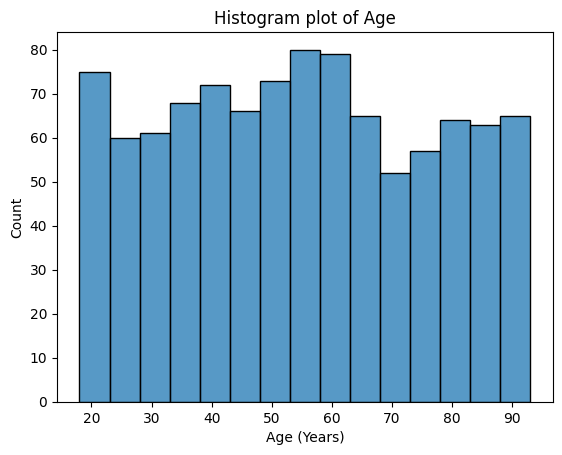

In [38]:
age_plot = sns.histplot(data=acw_user_data_df['Age (Years)'], binwidth=5) # Histogram plot
plt.title('Histogram plot of Age')

           - univariate plots of Dependents; fixing data errors with seaborn itself.

In [39]:
# introducing fillna()to replace empty spaces/rows with 0 under the Dependants columns
acw_user_data_df['Dependants'].fillna(value = 0, inplace = True)

Text(0.5, 1.0, 'Count Plot of Dependants')

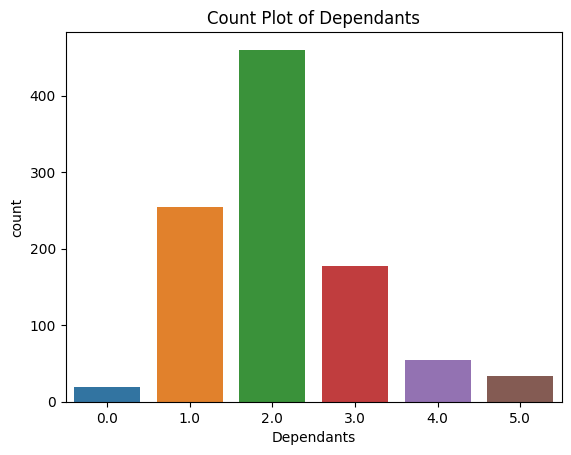

In [40]:

# countplot as the best option for the plot since the data "Dependants" is a discrete data
Dependants_plot = sns.countplot(data=acw_user_data_df, x="Dependants")
plt.xlabel("Dependants")
plt.title("Count Plot of Dependants")


           - univariate plots of Age (of default bins); conditioned on Marital Status

Text(0.5, 1.0, 'DisPlot of Age Conditioned on  Marital status ')

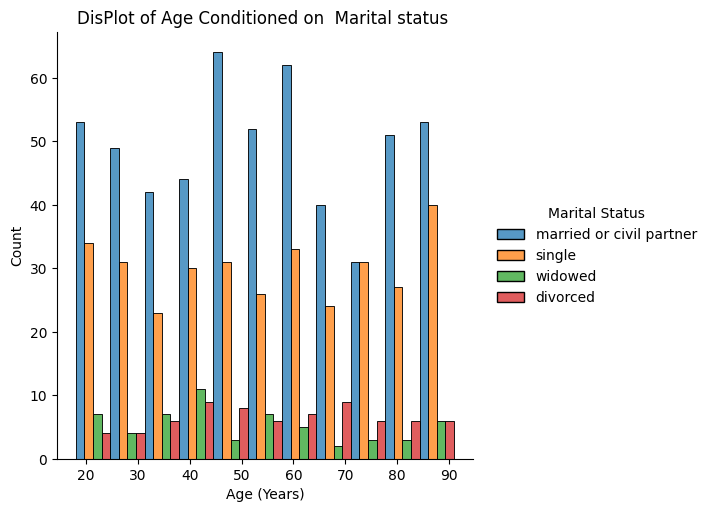

In [41]:
# Age (of default bins), conditioned on Marital Status 
DAge_Vs_MASC = sns.displot(data=acw_user_data_df, x = 'Age (Years)', hue = 'Marital Status', multiple= 'dodge')
plt.title('DisPlot of Age Conditioned on  Marital status ')

      - univariate plots of Age (of default bins); conditioned on Marital Status

Text(0.5, 1.0, 'Histogram Plot of Age Conditioned on  Marital status ')

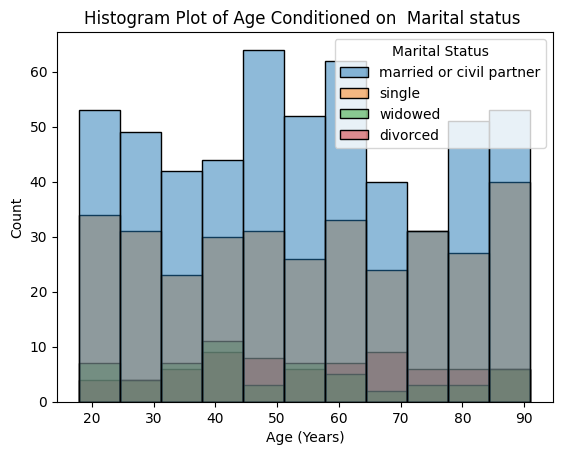

In [42]:
# Age (of default bins), conditioned on Marital Status 
Age_verses_Maritalstatus = sns.histplot(data=acw_user_data_df, x = 'Age (Years)', hue = 'Marital Status')
plt.title('Histogram Plot of Age Conditioned on  Marital status ')

### Task 3: Perform multivariate plots with the following data attributes
- a. Commuted distance against salary.
- b. Age against Salary
- c. Age against Salary conditioned by Dependants

                  - multivariate plots of Commuted distance against salary

Text(0.5, 1.0, 'Scattered Plot of Commuted Distance Agaisnt Salary')

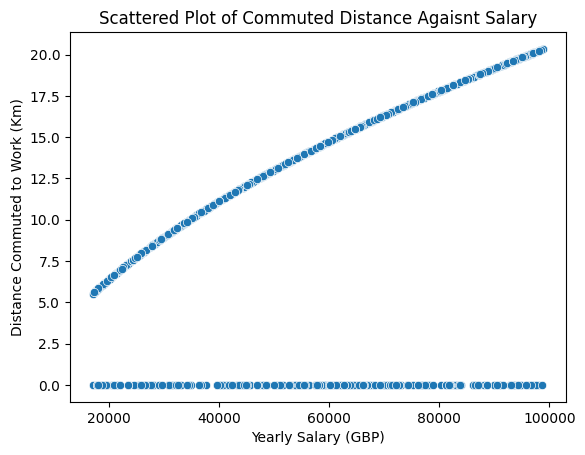

In [43]:
# Scattered plot was used because both variables are continuous
Distance_against_Salary= sns.scatterplot(data=acw_user_data_df, x="Yearly Salary (GBP)", y="Distance Commuted to Work (Km)")
plt.title('Scattered Plot of Commuted Distance Agaisnt Salary')

                       - Multivariate plots of Age against Salary

Text(0.5, 1.0, 'Scattered Plot of Age Against Yearly Salary')

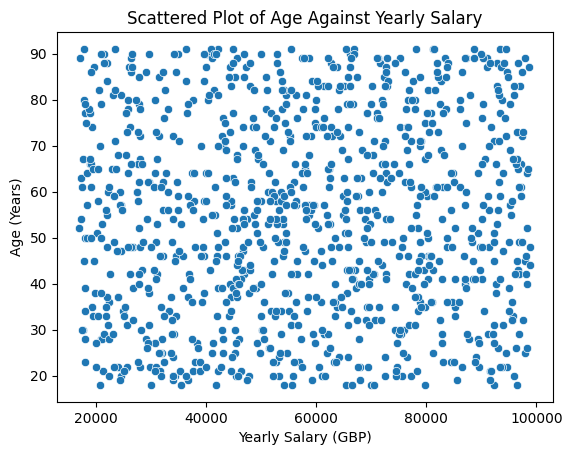

In [44]:
# Scattered plot was used becuase both variables are continuous
Age_against_Salary = sns.scatterplot(data=acw_user_data_df, x="Yearly Salary (GBP)", y="Age (Years)")
plt.title('Scattered Plot of Age Against Yearly Salary')

            - mulltivariate plots of Age against Salary conditioned by Dependants

Text(0.5, 1.0, 'Scattered Plot of Age Against Salary Conditioned by Dependants')

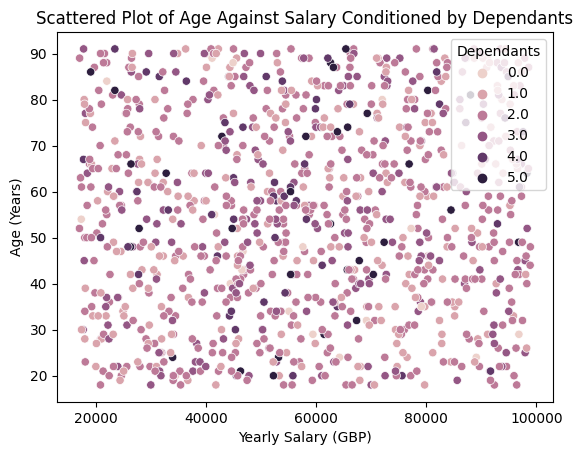

In [45]:
Age_against_SalC = sns.scatterplot(data=acw_user_data_df, x="Yearly Salary (GBP)", y="Age (Years)", hue="Dependants")
plt.title('Scattered Plot of Age Against Salary Conditioned by Dependants')

### Task 4: Saving all the plots generated

In [46]:
Age_plot_kde.get_figure().savefig('Age_plot_kde.png')
age_plot.get_figure().savefig('age_plot.png')
Dependants_plot.get_figure().savefig('Dependants_plot.png')
Age_verses_Maritalstatus.get_figure().savefig('Age_verses_Maritalstatus_plot.png')
Distance_against_Salary.get_figure().savefig('Distance_against_Salary_plot.png')
Age_against_Salary.get_figure().savefig('Age_against_Salary_plot.png')
Age_against_SalC.get_figure().savefig('Age_against_SalC_plot.png')
DAge_Vs_MASC.savefig('DAge_Vs_MASC_plot.png')